In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from textblob import TextBlob
import nltk
import tslearn
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import preprocessing
import timestring
import datetime

In [2]:
missing_values = ["n/a", "na", "--"]

In [3]:
stock = pd.read_csv("AprilData.csv", sep = ",", na_values = missing_values)
news = pd.read_csv("newsdata.csv", sep=",",na_values = missing_values)
combained = pd.read_csv("combined.csv", sep = ",",na_values = missing_values)
news.head()



,Id,newsdate,companyname,headline,article,link,created_at
0,1,"April 30, 2019 10:41 am +08",PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57
1,2,"April 29, 2019 12:30 pm +08",PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58
2,3,"April 29, 2019 10:54 am +08",PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58
3,4,"April 29, 2019 09:17 am +08",PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59
4,5,"April 29, 2019 07:11 am +08",PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59


In [4]:
stock.drop(["Id","created_at"], axis=1, inplace=True)
stock.head()

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
0,2019-04-01 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,20000
1,2019-04-02 16:00:00,main_market,healthcare,ADVENTA,7191,0.350,0.350,0.350,0.350,1000
2,2019-04-03 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.355,0.355,5000
3,2019-04-04 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,32000
4,2019-04-07 16:00:00,main_market,healthcare,ADVENTA,7191,0.355,0.355,0.350,0.350,31600


In [5]:
stock_missing = stock.isnull().sum()
news_missing = news.isnull().sum()

In [6]:
print(stock_missing,news_missing)

stockdate      0
sector         0
subsector      0
companyname    0
stockcode      0
openprice      0
highprice      0
lowprice       0
lastprice      0
volume         0
dtype: int64 Id             0
newsdate       0
companyname    0
headline       0
article        0
link           0
created_at     0
dtype: int64


In [7]:
stock.dtypes

stockdate       object
sector          object
subsector       object
companyname     object
stockcode       object
openprice      float64
highprice      float64
lowprice       float64
lastprice      float64
volume           int64
dtype: object

In [8]:
stock.describe

<bound method NDFrame.describe of                  stockdate       sector     subsector companyname stockcode  \
0      2019-04-01 16:00:00  main_market    healthcare     ADVENTA      7191   
1      2019-04-02 16:00:00  main_market    healthcare     ADVENTA      7191   
2      2019-04-03 16:00:00  main_market    healthcare     ADVENTA      7191   
3      2019-04-04 16:00:00  main_market    healthcare     ADVENTA      7191   
4      2019-04-07 16:00:00  main_market    healthcare     ADVENTA      7191   
5      2019-04-08 16:00:00  main_market    healthcare     ADVENTA      7191   
6      2019-04-09 16:00:00  main_market    healthcare     ADVENTA      7191   
7      2019-04-10 16:00:00  main_market    healthcare     ADVENTA      7191   
8      2019-04-11 16:00:00  main_market    healthcare     ADVENTA      7191   
9      2019-04-14 16:00:00  main_market    healthcare     ADVENTA      7191   
10     2019-04-15 16:00:00  main_market    healthcare     ADVENTA      7191   
11     2019-04-16 

In [9]:
stock["sector"].unique()

array(['main_market', 'ace_market', 'bond_loan', 'warrants', 'etf'],
      dtype=object)

In [10]:
stock["subsector"].unique()

array(['healthcare', 'energy', 'tecnology', 'properties', 'utilities',
       'finance', 'telco_media', 'consumer', 'constructn', 'reits',
       'ind-prod', 'plantation', 'transport', 'closedfund', 'technology',
       'bondislamic', 'etfbond', 'etfequity', 'etfcommodity'],
      dtype=object)

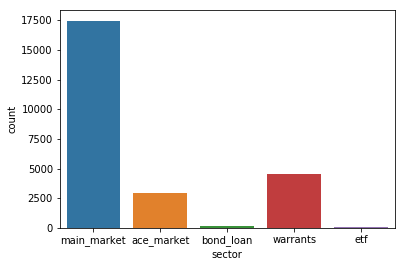

In [11]:
sns.countplot(x = stock["sector"])

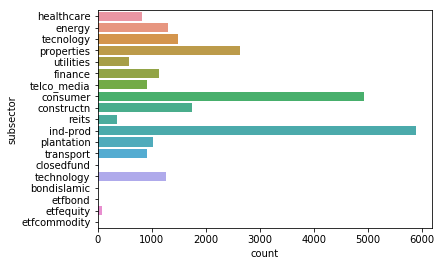

In [12]:
sns.countplot(y = stock["subsector"])

In [13]:
news.dtypes

Id              int64
newsdate       object
companyname    object
headline       object
article        object
link           object
created_at     object
dtype: object

In [14]:
news["newsdate"]= news["newsdate"].apply(lambda x:timestring.Date(x).date)
news.head()

,Id,newsdate,companyname,headline,article,link,created_at
0,1,2019-04-30 10:41:00,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57
1,2,2019-04-29 12:30:00,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58
2,3,2019-04-29 10:54:00,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58
3,4,2019-04-29 09:17:00,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59
4,5,2019-04-29 07:11:00,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59


In [15]:
news["newsdate"] = news["newsdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
news.head()

,Id,newsdate,companyname,headline,article,link,created_at
0,1,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57
1,2,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58
2,3,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58
3,4,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59
4,5,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59


In [16]:
news["headlinepolarity"] = [TextBlob(news["headline"].iloc[i]).polarity for i in range(0,news.shape[0])]

In [17]:
news["articlepolarity"] = [TextBlob(news["article"].iloc[i]).polarity for i in range(0,news.shape[0])]
news.head()

,Id,newsdate,companyname,headline,article,link,created_at,headlinepolarity,articlepolarity
0,1,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57,0.000000,0.041020
1,2,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58,0.000000,-0.020236
2,3,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58,0.000000,0.025275
3,4,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59,0.285714,-0.008036
4,5,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59,0.000000,-0.047009


In [18]:
news['polarity'] = news[['headlinepolarity','articlepolarity']].sum(axis=1)
news.head()

,Id,newsdate,companyname,headline,article,link,created_at,headlinepolarity,articlepolarity,polarity
0,1,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:57,0.000000,0.041020,0.041020
1,2,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,2019-05-01 20:02:58,0.000000,-0.020236,-0.020236
2,3,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,2019-05-01 20:02:58,0.000000,0.025275,0.025275
3,4,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,2019-05-01 20:02:59,0.285714,-0.008036,0.277679
4,5,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,2019-05-01 20:02:59,0.000000,-0.047009,-0.047009


In [19]:
news.drop(["Id","created_at"], axis=1, inplace=True)
news.head()

,newsdate,companyname,headline,article,link,headlinepolarity,articlepolarity,polarity
0,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,0.000000,0.041020,0.041020
1,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,0.000000,-0.020236,-0.020236
2,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,0.000000,0.025275,0.025275
3,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,0.285714,-0.008036,0.277679
4,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,0.000000,-0.047009,-0.047009


In [20]:
PETRONAS_news = news
CIMB_news = news

In [21]:
PETRONAS_news = PETRONAS_news.iloc[np.where(news["companyname"]=="PETRONAS")]
PETRONAS_news

,newsdate,companyname,headline,article,link,headlinepolarity,articlepolarity,polarity
0,2019-04-30,PETRONAS,Petronas looks to Americas to increase oil res...,KUALA LUMPUR (April 30): Malaysia’s state-owne...,https://www.theedgemarkets.com/article/petrona...,0.000000,0.041020,0.041020
1,2019-04-29,PETRONAS,Malaysia's stock market might turn a corner so...,"SINGAPORE (April 29): Malaysian equities, the ...",https://www.theedgemarkets.com/article/malaysi...,0.000000,-0.020236,-0.020236
2,2019-04-29,PETRONAS,"PetGas secures 22-year steam supply deal, elec...","KUALA LUMPUR: Petronas Gas Bhd (PetGas), a uni...",https://www.theedgemarkets.com/article/petgas-...,0.000000,0.025275,0.025275
3,2019-04-29,PETRONAS,CCM at right place and time for Rapid,KUALA LUMPUR: Being at the right place and at ...,https://www.theedgemarkets.com/article/ccm-rig...,0.285714,-0.008036,0.277679
4,2019-04-29,PETRONAS,"Petronas Dagangan in a downtrend, says Allianc...",KUALA LUMPUR (April 29): AllianceDBS Research ...,https://www.theedgemarkets.com/article/petrona...,0.000000,-0.047009,-0.047009
5,2019-04-26,PETRONAS,Malaysia Marine and Heavy Engineering 1Q net l...,KUALA LUMPUR (April 26): Malaysia Marine and H...,https://www.theedgemarkets.com/article/malaysi...,-0.100000,0.029623,-0.070377
6,2019-04-26,PETRONAS,Petronas acquires 50% equity in Brazil's Tarta...,KUALA LUMPUR (April 26): Petroliam Nasional Bh...,https://www.theedgemarkets.com/article/petrona...,0.000000,0.133333,0.133333
7,2019-04-26,PETRONAS,Pantech to benefit from expected lifting of US...,"Pantech Group Holdings Bhd\n(April 25, 57 sen)...",https://www.theedgemarkets.com/article/pantech...,-0.100000,0.032102,-0.067898
8,2019-04-26,PETRONAS,Petronas Dagangan increases FY19 capex to RM500m,"KUALA LUMPUR: Petronas Dagangan Bhd (PetDag), ...",https://www.theedgemarkets.com/article/petrona...,0.000000,0.178971,0.178971
9,2019-04-26,PETRONAS,Petrobras sells rights to two fields to Petron...,RIO DE JANEIRO (April 26): Brazil's state-run ...,https://www.theedgemarkets.com/article/petrobr...,0.000000,0.103571,0.103571


In [22]:
PETRONAS_news.index = pd.to_datetime(PETRONAS_news["newsdate"])

In [23]:
PETRONAS_news1 = PETRONAS_news.loc["2019-04-30":"2019-04-01"].resample("B").sum()
PETRONAS_news1

,headlinepolarity,articlepolarity,polarity
newsdate,,,
2019-04-02,0.216667,0.502007,0.718674
2019-04-03,0.318182,0.076350,0.394532
2019-04-04,-0.237500,0.182032,-0.055468
2019-04-05,0.200000,0.342162,0.542162
2019-04-08,0.300000,0.603960,0.903960
2019-04-09,0.000000,-0.001299,-0.001299
2019-04-10,0.000000,0.342159,0.342159
2019-04-11,0.333333,0.404548,0.737882
2019-04-12,-0.422222,0.397601,-0.024621


In [50]:
PETRONAS_news1["polarity_cat"] = PETRONAS_news1["headlinepolarity"].apply(polarity_cat)
PETRONAS_news1

,headlinepolarity,articlepolarity,polarity,polarity_cat
newsdate,,,,
2019-04-02,0.216667,0.502007,0.718674,positive
2019-04-03,0.318182,0.076350,0.394532,positive
2019-04-04,-0.237500,0.182032,-0.055468,negative
2019-04-05,0.200000,0.342162,0.542162,positive
2019-04-08,0.300000,0.603960,0.903960,positive
2019-04-09,0.000000,-0.001299,-0.001299,neutral
2019-04-10,0.000000,0.342159,0.342159,neutral
2019-04-11,0.333333,0.404548,0.737882,positive
2019-04-12,-0.422222,0.397601,-0.024621,negative


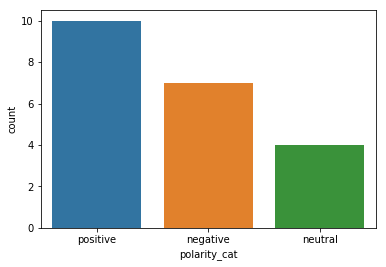

In [51]:
sns.countplot(PETRONAS_news1["polarity_cat"])

In [24]:
PETRONAS_stock = stock.loc[np.where(stock["companyname"]=="PETRONM")]
PETRONAS_stock

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
747,2019-04-01 16:00:00,main_market,energy,PETRONM,3042,6.56,6.61,6.56,6.58,32700
748,2019-04-02 16:00:00,main_market,energy,PETRONM,3042,6.58,6.63,6.55,6.56,154300
749,2019-04-03 16:00:00,main_market,energy,PETRONM,3042,6.51,6.60,6.51,6.57,68600
750,2019-04-04 16:00:00,main_market,energy,PETRONM,3042,6.56,6.75,6.56,6.58,213900
751,2019-04-07 16:00:00,main_market,energy,PETRONM,3042,6.64,6.74,6.58,6.70,128900
752,2019-04-08 16:00:00,main_market,energy,PETRONM,3042,6.73,6.73,6.60,6.62,173300
753,2019-04-09 16:00:00,main_market,energy,PETRONM,3042,6.56,6.68,6.56,6.62,27300
754,2019-04-10 16:00:00,main_market,energy,PETRONM,3042,6.60,6.67,6.60,6.61,45500
755,2019-04-11 16:00:00,main_market,energy,PETRONM,3042,6.61,6.63,6.60,6.60,47500
756,2019-04-14 16:00:00,main_market,energy,PETRONM,3042,6.68,6.69,6.55,6.55,106600


In [25]:
PETRONAS_stock["stockdate"] = PETRONAS_stock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
PETRONAS_stock.head()

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
747,2019-04-01,main_market,energy,PETRONM,3042,6.56,6.61,6.56,6.58,32700
748,2019-04-02,main_market,energy,PETRONM,3042,6.58,6.63,6.55,6.56,154300
749,2019-04-03,main_market,energy,PETRONM,3042,6.51,6.60,6.51,6.57,68600
750,2019-04-04,main_market,energy,PETRONM,3042,6.56,6.75,6.56,6.58,213900
751,2019-04-07,main_market,energy,PETRONM,3042,6.64,6.74,6.58,6.70,128900


In [26]:
PETRONAS_stock.index = pd.to_datetime(PETRONAS_stock["stockdate"])
PETRONAS_stock.loc['2019-04-01':]

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
stockdate,,,,,,,,,,
2019-04-01,2019-04-01,main_market,energy,PETRONM,3042,6.56,6.61,6.56,6.58,32700
2019-04-02,2019-04-02,main_market,energy,PETRONM,3042,6.58,6.63,6.55,6.56,154300
2019-04-03,2019-04-03,main_market,energy,PETRONM,3042,6.51,6.60,6.51,6.57,68600
2019-04-04,2019-04-04,main_market,energy,PETRONM,3042,6.56,6.75,6.56,6.58,213900
2019-04-07,2019-04-07,main_market,energy,PETRONM,3042,6.64,6.74,6.58,6.70,128900
2019-04-08,2019-04-08,main_market,energy,PETRONM,3042,6.73,6.73,6.60,6.62,173300
2019-04-09,2019-04-09,main_market,energy,PETRONM,3042,6.56,6.68,6.56,6.62,27300
2019-04-10,2019-04-10,main_market,energy,PETRONM,3042,6.60,6.67,6.60,6.61,45500
2019-04-11,2019-04-11,main_market,energy,PETRONM,3042,6.61,6.63,6.60,6.60,47500


In [27]:
PETRONAS_combained = combained
PETRONAS_combained.head()

,Unnamed: 0,date,goldprice,silverprice,oilprice,gasprice
0,2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
1,2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2,2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
3,2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
4,2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664


In [28]:
PETRONAS_combained["date"] = PETRONAS_combained["date"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
PETRONAS_combained.head()

,Unnamed: 0,date,goldprice,silverprice,oilprice,gasprice
0,2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
1,2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2,2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
3,2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
4,2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664


In [29]:
PETRONAS_combained.index = pd.to_datetime(PETRONAS_combained["date"])
PETRONAS_combained = PETRONAS_combained.loc['2019-04-01':]

In [30]:
PETRONAS_combained

,Unnamed: 0,date,goldprice,silverprice,oilprice,gasprice
date,,,,,,
2019-04-01,2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
2019-04-02,2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2019-04-03,2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
2019-04-04,2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
2019-04-05,2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664
2019-04-07,2019-04-07,2019-04-07,15.088,15.088,70.339996,2.664
2019-04-08,2019-04-08,2019-04-08,15.216,15.216,71.099998,2.708
2019-04-09,2019-04-09,2019-04-09,15.211,15.211,70.610001,2.699
2019-04-10,2019-04-10,2019-04-10,15.244,15.244,71.730003,2.700


In [31]:
PETRONAS = pd.concat([PETRONAS_stock["lastprice"],PETRONAS_combained["goldprice"],
                     PETRONAS_combained["silverprice"],PETRONAS_combained["oilprice"],
                      PETRONAS_combained["gasprice"],PETRONAS_news1["polarity"]]
                      , keys = ["stockprice","goldprice","silverprice","oilprice","gasprice","newspolarity"], axis = 1).ffill().bfill()
PETRONAS

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
2019-04-01,6.58,15.099,15.099,69.010002,2.708,0.718674
2019-04-02,6.56,15.061,15.061,69.370003,2.684,0.718674
2019-04-03,6.57,15.102,15.102,69.309998,2.677,0.394532
2019-04-04,6.58,15.084,15.084,69.400002,2.643,-0.055468
2019-04-05,6.58,15.086,15.086,70.339996,2.664,0.542162
2019-04-07,6.70,15.088,15.088,70.339996,2.664,0.542162
2019-04-08,6.62,15.216,15.216,71.099998,2.708,0.903960
2019-04-09,6.62,15.211,15.211,70.610001,2.699,-0.001299
2019-04-10,6.61,15.244,15.244,71.730003,2.700,0.342159
2019-04-11,6.60,14.867,14.867,70.830002,2.664,0.737882


In [32]:
def polarity_cat (x):
       
    if (x> 0) :
        return "positive"
    elif (x<0):
        return "negative"
    else:
        return "neutral" 

In [33]:
PETRONAS["polarity_cat"] = PETRONAS["newspolarity"].apply(polarity_cat)
PETRONAS.head()

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity,polarity_cat
2019-04-01,6.58,15.099,15.099,69.010002,2.708,0.718674,positive
2019-04-02,6.56,15.061,15.061,69.370003,2.684,0.718674,positive
2019-04-03,6.57,15.102,15.102,69.309998,2.677,0.394532,positive
2019-04-04,6.58,15.084,15.084,69.400002,2.643,-0.055468,negative
2019-04-05,6.58,15.086,15.086,70.339996,2.664,0.542162,positive


/home/amir/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


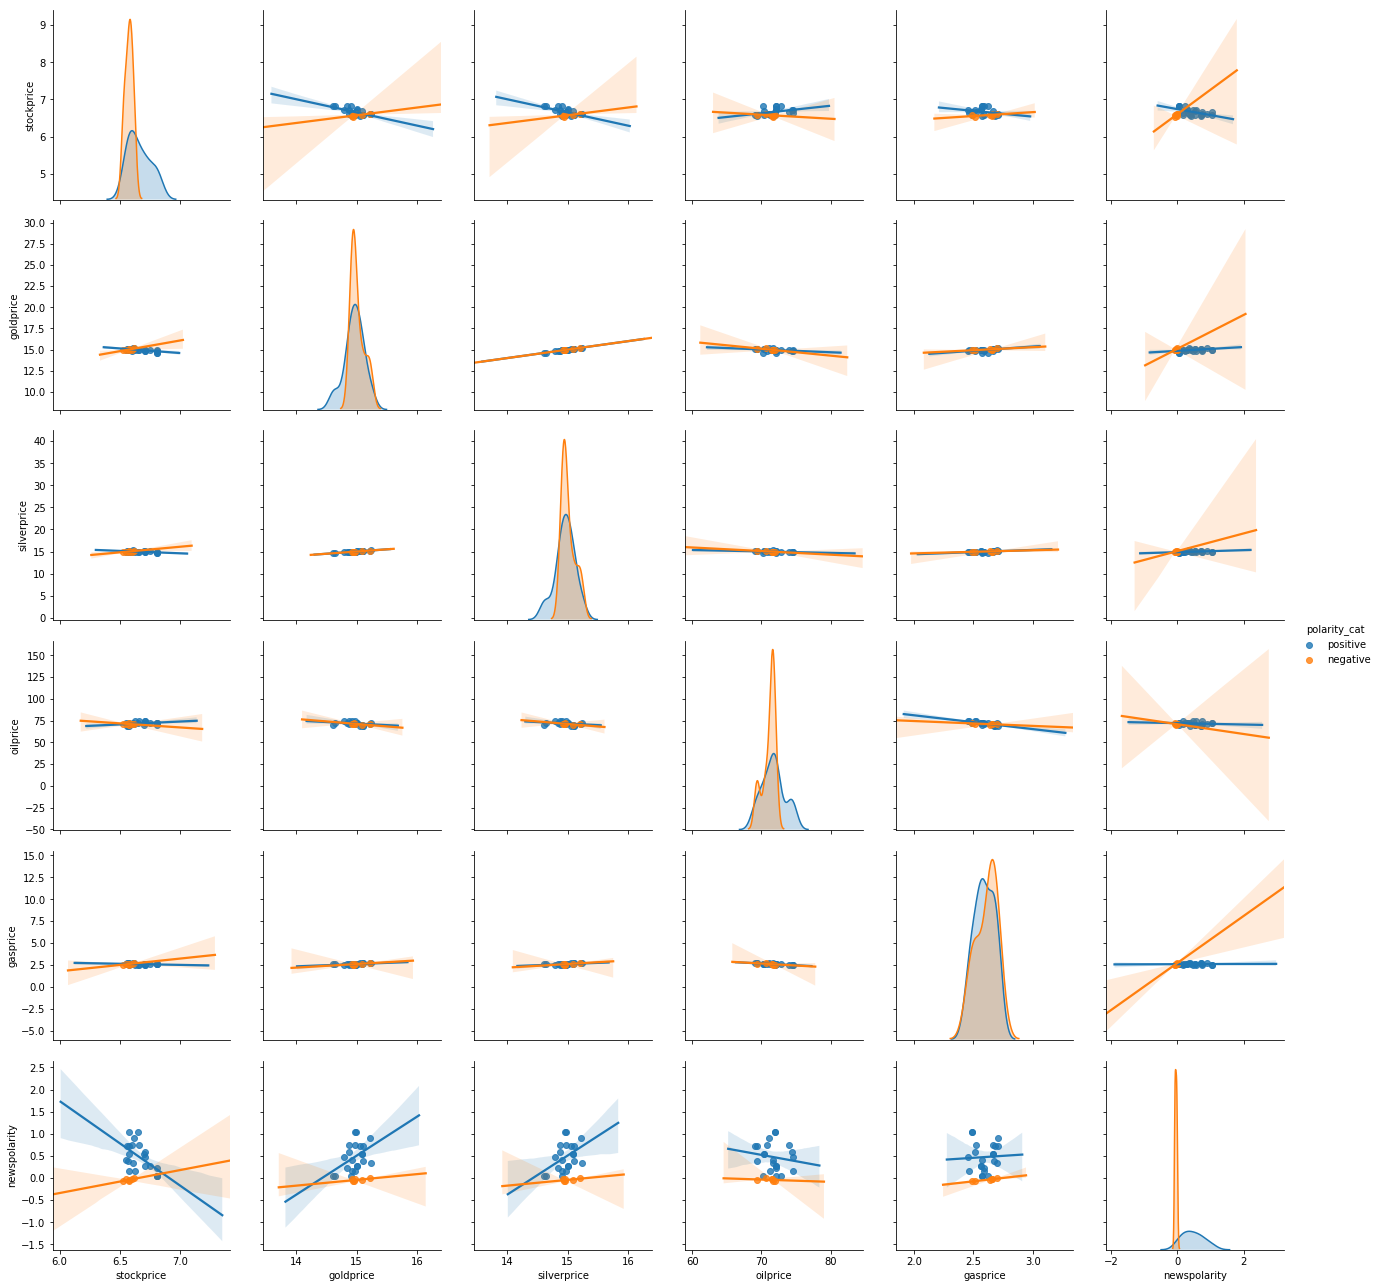

In [34]:
sns.pairplot(PETRONAS,kind="reg",hue="polarity_cat",size=3)

In [35]:
cov_mat = PETRONAS.cov()
cov_mat

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
stockprice,0.007855,-0.007124,-0.007136,0.049339,-0.001607,-0.004260
goldprice,-0.007124,0.022160,0.022188,-0.087909,0.006273,0.012985
silverprice,-0.007136,0.022188,0.022215,-0.087813,0.006275,0.013009
oilprice,0.049339,-0.087909,-0.087813,2.313204,-0.092287,-0.005825
gasprice,-0.001607,0.006273,0.006275,-0.092287,0.006622,-0.000280
newspolarity,-0.004260,0.012985,0.013009,-0.005825,-0.000280,0.121790


In [36]:
corr_mat= PETRONAS.corr()
corr_mat

,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
stockprice,1.000000,-0.539923,-0.540189,0.366014,-0.222745,-0.137721
goldprice,-0.539923,1.000000,0.999998,-0.388273,0.517834,0.249953
silverprice,-0.540189,0.999998,1.000000,-0.387374,0.517361,0.250105
oilprice,0.366014,-0.388273,-0.387374,1.000000,-0.745655,-0.010974
gasprice,-0.222745,0.517834,0.517361,-0.745655,1.000000,-0.009850
newspolarity,-0.137721,0.249953,0.250105,-0.010974,-0.009850,1.000000


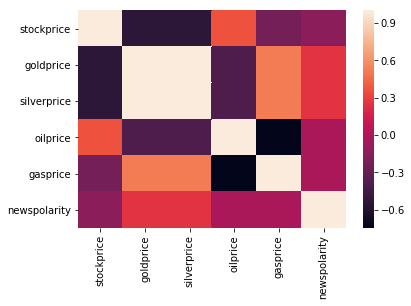

In [37]:
sns.heatmap(corr_mat)

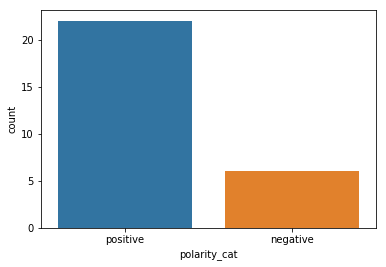

In [38]:
sns.countplot(PETRONAS["polarity_cat"])

In [67]:
CIMB_news = CIMB_news.iloc[np.where(news["companyname"]=="CIMB")]
CIMB_news

IndexError: positional indexers are out-of-bounds

In [68]:
CIMB_news.index = pd.to_datetime(CIMB_news["newsdate"])
CIMB_news.head()

,newsdate,companyname,headline,article,link,headlinepolarity,articlepolarity,polarity
newsdate,,,,,,,,
2019-05-01,2019-05-01,CIMB,Najib's SRC Trial: Prosecution witnesses’ test...,"1 MOHAMAD Akmaludin Abdullah, 35, assistant...",https://www.theedgemarkets.com/article/najibs-...,0.000000,0.094455,0.094455
2019-04-30,2019-04-30,CIMB,MRCB seeks expressions of interest for Menara ...,"MALAYSIAN Resources Corp Bhd (MRCB), the devel...",https://www.theedgemarkets.com/article/mrcb-se...,0.000000,0.079228,0.079228
2019-04-30,2019-04-30,CIMB,Are banks worth a second look as half of them ...,HALF of the banks listed on Bursa Malaysia hav...,https://www.theedgemarkets.com/article/are-ban...,0.044444,0.101884,0.146329
2019-04-30,2019-04-30,CIMB,Public Bank's 1Q results meet HLIB expectation...,KUALA LUMPUR (April 30): Public Bank Bhd's mar...,https://www.theedgemarkets.com/article/public-...,0.000000,-0.020690,-0.020690
2019-04-30,2019-04-30,CIMB,CIMB’s loan growth expected to gather momentum...,"CIMB Group Holdings Bhd\n(April 29, RM5.20)\nM...",https://www.theedgemarkets.com/article/cimbs-l...,-0.100000,0.120238,0.020238


In [69]:
CIMB_news1 = CIMB_news.loc["2019-04-30":"2019-04-01"].resample("B").sum()
CIMB_news1

,headlinepolarity,articlepolarity,polarity
newsdate,,,
2019-04-02,0.250000,0.273898,0.523898
2019-04-03,0.500000,0.196057,0.696057
2019-04-04,0.000000,0.348740,0.348740
2019-04-05,-0.263636,0.318710,0.055073
2019-04-08,0.827273,0.570715,1.397987
2019-04-09,0.208081,0.145665,0.353745
2019-04-10,-0.155556,0.051947,-0.103608
2019-04-11,-0.300000,0.082611,-0.217389
2019-04-12,0.500000,0.609541,1.109541


In [70]:
CIMB_stock = stock.loc[np.where(stock["companyname"]=="CIMB")]
CIMB_stock

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
4908,2019-04-01 16:00:00,main_market,finance,CIMB,1023,5.10,5.13,5.09,5.12,7280700
4909,2019-04-02 16:00:00,main_market,finance,CIMB,1023,5.12,5.14,5.09,5.12,4853400
4910,2019-04-03 16:00:00,main_market,finance,CIMB,1023,5.12,5.14,5.08,5.10,5893700
4911,2019-04-04 16:00:00,main_market,finance,CIMB,1023,5.10,5.13,5.10,5.11,2330800
4912,2019-04-07 16:00:00,main_market,finance,CIMB,1023,5.10,5.12,5.08,5.09,7378400
4913,2019-04-08 16:00:00,main_market,finance,CIMB,1023,5.10,5.11,5.07,5.09,12074500
4914,2019-04-09 16:00:00,main_market,finance,CIMB,1023,5.09,5.10,5.06,5.08,3525600
4915,2019-04-10 16:00:00,main_market,finance,CIMB,1023,5.08,5.12,5.06,5.06,7562100
4916,2019-04-11 16:00:00,main_market,finance,CIMB,1023,5.07,5.08,5.06,5.06,3507200
4917,2019-04-14 16:00:00,main_market,finance,CIMB,1023,5.07,5.13,5.06,5.06,3695800


In [71]:
CIMB_stock["stockdate"]= CIMB_stock["stockdate"].apply(lambda x:pd.datetime.date(pd.to_datetime(x)))
CIMB_stock.head()

,stockdate,sector,subsector,companyname,stockcode,openprice,highprice,lowprice,lastprice,volume
4908,2019-04-01,main_market,finance,CIMB,1023,5.10,5.13,5.09,5.12,7280700
4909,2019-04-02,main_market,finance,CIMB,1023,5.12,5.14,5.09,5.12,4853400
4910,2019-04-03,main_market,finance,CIMB,1023,5.12,5.14,5.08,5.10,5893700
4911,2019-04-04,main_market,finance,CIMB,1023,5.10,5.13,5.10,5.11,2330800
4912,2019-04-07,main_market,finance,CIMB,1023,5.10,5.12,5.08,5.09,7378400


In [ ]:
CIMB_stock.index = CIMB_stock
CIMB_combained = CIMB_combained.loc['2019-04-01':]

In [61]:
CIMB_combained = combained
CIMB_combained.head()

,Unnamed: 0,date,goldprice,silverprice,oilprice,gasprice
date,,,,,,
2019-04-01,2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
2019-04-02,2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2019-04-03,2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
2019-04-04,2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
2019-04-05,2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664


In [65]:
CIMB_combained.index = pd.to_datetime(CIMB_combained["date"])
CIMB_combained = CIMB_combained.loc['2019-04-01':]
CIMB_combained

,Unnamed: 0,date,goldprice,silverprice,oilprice,gasprice
date,,,,,,
2019-04-01,2019-04-01,2019-04-01,15.099,15.099,69.010002,2.708
2019-04-02,2019-04-02,2019-04-02,15.061,15.061,69.370003,2.684
2019-04-03,2019-04-03,2019-04-03,15.102,15.102,69.309998,2.677
2019-04-04,2019-04-04,2019-04-04,15.084,15.084,69.400002,2.643
2019-04-05,2019-04-05,2019-04-05,15.086,15.086,70.339996,2.664
2019-04-07,2019-04-07,2019-04-07,15.088,15.088,70.339996,2.664
2019-04-08,2019-04-08,2019-04-08,15.216,15.216,71.099998,2.708
2019-04-09,2019-04-09,2019-04-09,15.211,15.211,70.610001,2.699
2019-04-10,2019-04-10,2019-04-10,15.244,15.244,71.730003,2.700


In [63]:
CIMB = pd.concat([CIMB_stock["lastprice"],CIMB_combained["goldprice"],
                     CIMB_combained["silverprice"],CIMB_combained["oilprice"],
                      CIMB_combained["gasprice"],CIMB_news1["polarity"]]
                      , keys = ["stockprice","goldprice","silverprice","oilprice","gasprice","newspolarity"], axis = 1).ffill().bfill()
CIMB

/home/amir/anaconda3/lib/python3.7/site-packages/pandas/core/indexes/api.py:183: RuntimeWarning: Cannot compare type 'Timestamp' with type 'date', sort order is undefined for incomparable objects
  result = result.union(other)


,stockprice,goldprice,silverprice,oilprice,gasprice,newspolarity
2019-04-01,5.12,15.099,15.099,69.010002,2.708,0.523898
2019-04-02,5.12,15.061,15.061,69.370003,2.684,0.523898
2019-04-03,5.10,15.102,15.102,69.309998,2.677,0.696057
2019-04-04,5.11,15.084,15.084,69.400002,2.643,0.348740
2019-04-07,5.09,15.088,15.088,70.339996,2.664,0.348740
2019-04-08,5.09,15.216,15.216,71.099998,2.708,1.397987
2019-04-09,5.08,15.211,15.211,70.610001,2.699,0.353745
2019-04-10,5.06,15.244,15.244,71.730003,2.700,-0.103608
2019-04-11,5.06,14.867,14.867,70.830002,2.664,-0.217389
2019-04-14,5.06,14.918,14.918,71.550003,2.660,-0.217389


In [ ]:
sns.pairplot(CIMB,kind="reg",hue="polarity_cat",size=3)